           Importing Libraries 

In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

           Import the dataset

In [104]:
campaign = pd.read_excel(r"C:\Users\hp\OneDrive\HNG Internship\TASK 2\marketing_campaign_dataset.xlsx")

           Understanding the data structure 

In [105]:
campaign.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


In [106]:
#Exploring the data types 
campaign.dtypes

Campaign_ID           int64
Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost      int64
ROI                 float64
Location             object
Date                 object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
dtype: object

Data Types:
 Numeric: Conversion_Rate, Acquisition_Cost, ROI, Clicks, Impressions, Engagement_Score.

 Categorical: Company, Campaign_Type, Target_Audience, Channel_Used, Location, Customer_Segment, Duration.
 
Date is stored as an object and should be converted to a datetime format for proper time-based analysis.


In [107]:
# Convert Date column to datetime format
campaign["Date"] = pd.to_datetime(campaign["Date"], errors='coerce')


In [108]:
#Initial dataset size before cleaning 
print(campaign.shape,campaign.size )

(200005, 15) 3000075


In [109]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200005 non-null  int64         
 1   Company           200005 non-null  object        
 2   Campaign_Type     200005 non-null  object        
 3   Target_Audience   200005 non-null  object        
 4   Duration          200005 non-null  object        
 5   Channel_Used      200005 non-null  object        
 6   Conversion_Rate   200005 non-null  float64       
 7   Acquisition_Cost  200005 non-null  int64         
 8   ROI               200005 non-null  float64       
 9   Location          200005 non-null  object        
 10  Date              200005 non-null  datetime64[ns]
 11  Clicks            200005 non-null  int64         
 12  Impressions       200005 non-null  int64         
 13  Engagement_Score  200005 non-null  int64         
 14  Cust

           Data cleaning: Checking for duplicates, null values and outliers

In [110]:
# Missing values 
campaign.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Date                0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64

In [111]:
#Duplicate values 
campaign.duplicated().sum()

np.int64(0)

In [112]:
# Remove '$' sign and convert 'Acquisition_Cost' to float
campaign['Acquisition_Cost'] = campaign['Acquisition_Cost'].replace({'$': '', ',': ''}, regex=True).astype(float)

           Basic statistics

In [113]:
#Checking for mean, std and median
campaign.describe() 

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Date,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,12504.441794,5.002416,2021-07-01 23:37:44.289392896,549.774591,5507.307107,5.494673
min,1.000000,0.010000,5000.000000,2.000000,2021-01-01 00:00:00,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,8740.000000,3.500000,2021-04-02 00:00:00,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,12497.000000,5.010000,2021-07-02 00:00:00,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,16264.000000,6.510000,2021-10-01 00:00:00,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,20000.000000,8.000000,2021-12-31 00:00:00,1000.000000,10000.000000,10.000000
std,57736.614632,0.040602,4337.663210,1.734485,NaN,260.019354,2596.863794,2.872593


In [114]:
campaign.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,2021-01-01,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,2021-02-01,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,2021-03-01,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,2021-04-01,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,2021-05-01,379,4201,3,Health & Wellness


In [115]:
#Unique values values in categorical columns
categorical_cols = ["Company", "Campaign_Type", "Target_Audience", "Channel_Used", "Location", "Customer_Segment", "Duration"]
unique_values = {col: campaign[col].nunique() for col in categorical_cols}

unique_values

{'Company': 5,
 'Campaign_Type': 5,
 'Target_Audience': 5,
 'Channel_Used': 6,
 'Location': 5,
 'Customer_Segment': 5,
 'Duration': 4}

In [116]:
unique_values_details = {col: campaign[col].unique() for col in categorical_cols}
unique_values_details

{'Company': array(['Innovate Industries', 'NexGen Systems', 'Alpha Innovations',
        'DataTech Solutions', 'TechCorp'], dtype=object),
 'Campaign_Type': array(['Email', 'Influencer', 'Display', 'Search', 'Social Media'],
       dtype=object),
 'Target_Audience': array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
       dtype=object),
 'Channel_Used': array(['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook',
        'Email'], dtype=object),
 'Location': array(['Chicago', 'New York', 'Los Angeles', 'Miami', 'Houston'],
       dtype=object),
 'Customer_Segment': array(['Health & Wellness', 'Fashionistas', 'Outdoor Adventurers',
        'Foodies', 'Tech Enthusiasts'], dtype=object),
 'Duration': array(['30 days', '60 days', '15 days', '45 days'], dtype=object)}

Marketing channels used are; 'Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook','Email'

Target audience : 'Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'

            Detecting and handling outliers

In [117]:
# Select numerical columns
numerical_cols = ["Clicks", "Impressions", "ROI", "Conversion_Rate", "Acquisition_Cost", "Engagement_Score"]

# Calculate IQR
Q1 = campaign[numerical_cols].quantile(0.25)
Q3 = campaign[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((campaign[numerical_cols] < (Q1 - 1.5 * IQR)) | (campaign[numerical_cols] > (Q3 + 1.5 * IQR)))

# Count number of outliers per column
outlier_counts = outliers.sum()
outlier_counts

Clicks              0
Impressions         0
ROI                 0
Conversion_Rate     0
Acquisition_Cost    0
Engagement_Score    0
dtype: int64

No outliers were found in the data set.

          Generating Insights 

Questions to ask 
1. What is the campaign performance across the different channels?
2. What is the average CTR, CPC, and Conversion Rate across all campaigns?
3. Which campaigns were high-performing and underperforming campaigns based on ROI?
4. Which locations had the highest CTR and Conversion Rates?

    Question 1:What is the campaign performance across the different channels?

In [118]:
# Calculate CTR
campaign['CTR'] = campaign['Clicks'] / campaign['Impressions']
campaign['CPC'] = campaign['Acquisition_Cost'] / campaign['Clicks']

# Grouping data by 'Channel_Used' and calculating key metrics
channel_performance = campaign.groupby("Channel_Used").agg(
    Total_Impressions=("Impressions", "sum"),
    Total_Clicks=("Clicks", "sum"),
    # mean of Conversion Rate
    Total_Spend=("Acquisition_Cost", "sum"),
    Avg_ROI=("ROI", "mean"),  # Mean ROI per channel
    Avg_Conversion_Rate=("Conversion_Rate", "mean") # the mean conversion rate
).reset_index()

# Calculating additional performance metrics
channel_performance["CTR (%)"] = (channel_performance["Total_Clicks"] / channel_performance["Total_Impressions"]) * 100
channel_performance["CPC"] = channel_performance["Total_Spend"] / channel_performance["Total_Clicks"]
channel_performance["Conversion Rate (%)"] = channel_performance["Avg_Conversion_Rate"] * 100  

# Display results
channel_performance

,Channel_Used,Total_Impressions,Total_Clicks,Total_Spend,Avg_ROI,Avg_Conversion_Rate,CTR (%),CPC,Conversion Rate (%)
0,Email,184801107,18493963,420874104.0,4.996487,0.080282,10.007496,22.757378,8.028156
1,Facebook,180662496,18038175,410603426.0,5.018672,0.079990,9.984460,22.763025,7.998995
2,Google Ads,185020154,18342589,418944514.0,5.003126,0.080181,9.913833,22.839988,8.018062
3,Instagram,183738455,18316654,417124850.0,4.988706,0.079886,9.968873,22.772983,7.988650
4,Website,183815901,18415351,416606897.0,5.014114,0.080182,10.018367,22.622805,8.018195
5,YouTube,183450845,18350935,416797090.0,4.993720,0.079890,10.003189,22.712581,7.988980


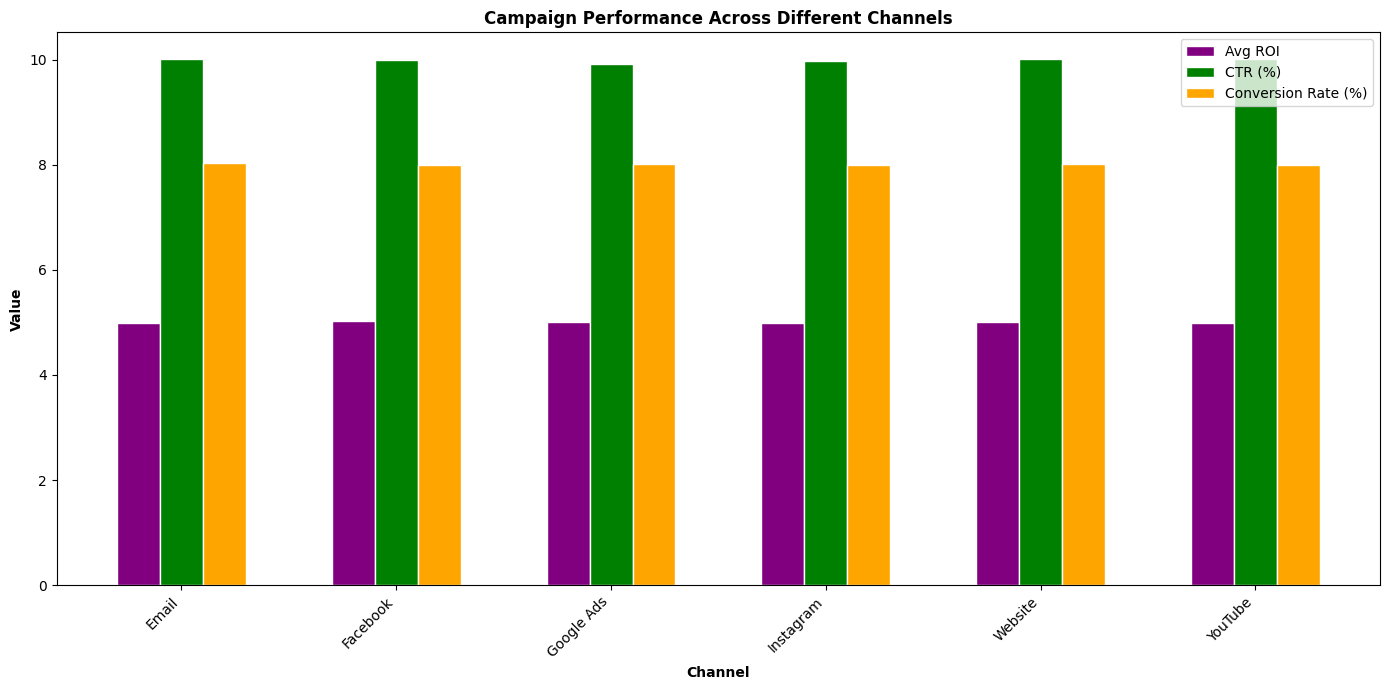

In [119]:
# Define the metric to plot
metrics = ['Avg_ROI', 'CTR (%)', 'Conversion Rate (%)']

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(channel_performance))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Make the plot
plt.figure(figsize=(14, 7))
plt.bar(r1, channel_performance['Avg_ROI'], color='purple', width=bar_width, edgecolor='white', label='Avg ROI')
plt.bar(r2, channel_performance['CTR (%)'], color='green', width=bar_width, edgecolor='white', label='CTR (%)')
plt.bar(r3, channel_performance['Conversion Rate (%)'], color='orange', width=bar_width, edgecolor='white', label='Conversion Rate (%)')

# Add xticks on the middle of the group bars
plt.xlabel('Channel', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(channel_performance))], channel_performance['Channel_Used'], rotation=45, ha='right')

# Create legend & title
plt.ylabel('Value', fontweight='bold')
plt.title('Campaign Performance Across Different Channels', fontweight='bold')
plt.legend()

# Show graphic
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

    Question 2: What is the average CTR, CPC, and Conversion Rate across all campaigns?

In [120]:

# Calculate CTR
campaign['CTR'] = campaign['Clicks'] / campaign['Impressions']
campaign['CPC'] = campaign['Acquisition_Cost'] / campaign['Clicks']

# 1. Average CTR, CPC, and Conversion Rate Across All Campaigns
average_ctr = campaign['CTR'].mean()
average_cpc = campaign['CPC'].mean()
average_conversion_rate = campaign['Conversion_Rate'].mean()

print(f"Average CTR Across All Campaigns: {average_ctr:.4f}")
print(f"Average CPC Across All Campaigns: ${average_cpc:.2f}")
print(f"Average Conversion Rate Across All Campaigns: {average_conversion_rate:.4f}")



Average CTR Across All Campaigns: 0.1404
Average CPC Across All Campaigns: $32.01
Average Conversion Rate Across All Campaigns: 0.0801


In [121]:
# 2. Campaigns with Below-Average CTR
below_avg_ctr_count = (campaign['CTR'] < average_ctr).sum()

print(f"\nNumber of Campaigns with Below-Average CTR: {below_avg_ctr_count}")




Number of Campaigns with Below-Average CTR: 135184


In [122]:
# 3. Campaigns with High CPC
cpc_75th_percentile = campaign['CPC'].quantile(0.75)
high_cpc_campaigns = campaign[campaign['CPC'] > cpc_75th_percentile]

# Sort by CPC in descending order and take the top 10
top_high_cpc_campaigns = high_cpc_campaigns.sort_values(by='CPC', ascending=False).head(10)

print(f"\nTop 10 Campaigns with High CPC (above ${cpc_75th_percentile:.2f}):")
print(top_high_cpc_campaigns[['Campaign_ID', 'Company', 'Channel_Used', 'CPC']])




Top 10 Campaigns with High CPC (above $38.60):
        Campaign_ID              Company Channel_Used         CPC
173075       173076       NexGen Systems     Facebook  199.960000
113856       113857   DataTech Solutions    Instagram  199.610000
146055       146056       NexGen Systems   Google Ads  198.570000
78266         78267       NexGen Systems        Email  197.861386
195041       195042       NexGen Systems    Instagram  197.405941
145269       145270  Innovate Industries        Email  197.350000
196302       196303    Alpha Innovations   Google Ads  196.881188
172797       172798       NexGen Systems      Website  196.830000
65705         65706    Alpha Innovations   Google Ads  196.396040
84539         84540   DataTech Solutions    Instagram  196.356436


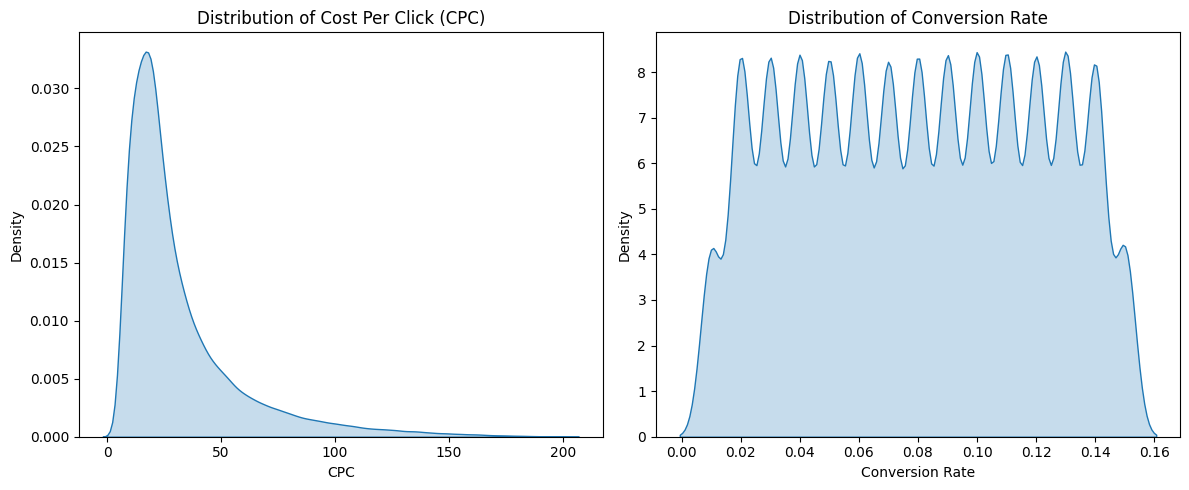

In [123]:
# 4. Density Plots: CPC and Conversion Rate
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(campaign['CPC'], fill=True)
plt.title('Distribution of Cost Per Click (CPC)')
plt.xlabel('CPC')

plt.subplot(1, 2, 2)
sns.kdeplot(campaign['Conversion_Rate'], fill=True)
plt.title('Distribution of Conversion Rate')
plt.xlabel('Conversion Rate')

plt.tight_layout()
plt.show()

    Question 3: Which campaigns were high-performing and underperforming campaigns based on ROI?


In [124]:
# 1. Identify Campaigns with the Highest ROI
top_n = 10  # Number of top campaigns to display
top_campaigns = campaign.sort_values(by='ROI', ascending=False).head(top_n)

print(f"Top {top_n} Campaigns with Highest ROI:")
print(top_campaigns[['Campaign_ID', 'Company', 'Channel_Used', 'Target_Audience', 'Campaign_Type', 'ROI']])




Top 10 Campaigns with Highest ROI:
        Campaign_ID              Company Channel_Used Target_Audience  \
31224         31225       NexGen Systems      Website        All Ages   
197609       197610   DataTech Solutions        Email       Men 18-24   
197558       197559    Alpha Innovations        Email     Women 25-34   
78792         78793  Innovate Industries    Instagram       Men 18-24   
169821       169822             TechCorp      YouTube       Men 25-34   
72072         72073   DataTech Solutions     Facebook     Women 35-44   
122761       122762             TechCorp      Website       Men 25-34   
50630         50631    Alpha Innovations     Facebook     Women 25-34   
157714       157715   DataTech Solutions      Website     Women 25-34   
32272         32273    Alpha Innovations      YouTube       Men 18-24   

       Campaign_Type  ROI  
31224     Influencer  8.0  
197609    Influencer  8.0  
197558  Social Media  8.0  
78792   Social Media  8.0  
169821         Email 

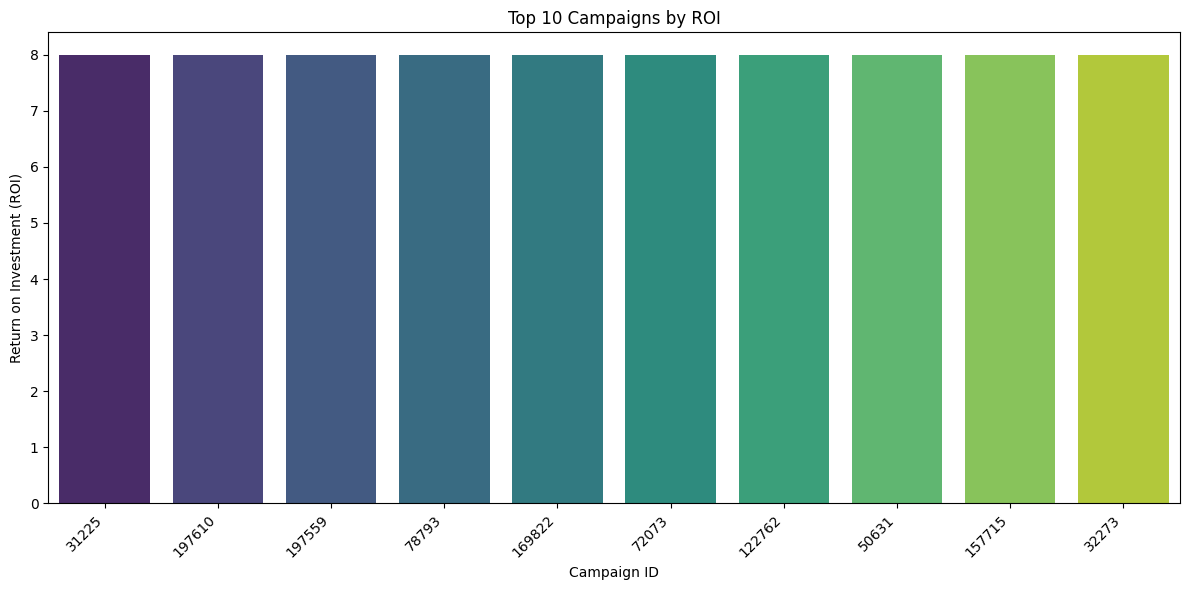

In [125]:
# 2. Bar Chart: ROI per Campaign (Sorted)
plt.figure(figsize=(12, 6))

# Ensure Campaign_ID is treated as a string for better x-axis labeling
top_campaigns['Campaign_ID'] = top_campaigns['Campaign_ID'].astype(str)

sns.barplot(x='Campaign_ID', y='ROI', data=top_campaigns, hue='Campaign_ID', palette='viridis', legend=False)
plt.title(f'Top {top_n} Campaigns by ROI')
plt.xlabel('Campaign ID')
plt.ylabel('Return on Investment (ROI)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


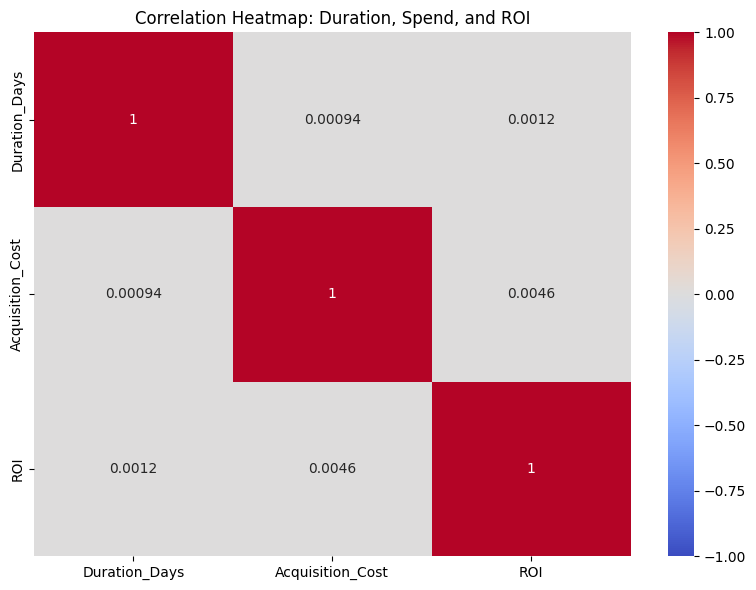

In [126]:
# 3. Heatmap: Correlation Between Campaign Duration, Spend, and ROI
# Convert 'Duration' to numeric if it's in a string format like "10 days"
campaign['Duration_Days'] = campaign['Duration'].str.extract("(\\d+)").astype(int)

# Compute correlation matrix
correlation_data = campaign[['Duration_Days', 'Acquisition_Cost', 'ROI']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Duration, Spend, and ROI')
plt.tight_layout()
plt.show()

    4. Which locations had the highest CTR and Conversion Rates?

In [127]:
# 1. Calculate Average CTR and Conversion Rate per Location
location_performance = campaign.groupby('Location').agg(
    average_ctr=('CTR', 'mean'),
    average_conversion_rate=('Conversion_Rate', 'mean'),
    average_roi = ('ROI', 'mean') # include average roi per location
).reset_index()

print("\nLocations with the Highest CTR and Conversion Rates:")
print(location_performance)




Locations with the Highest CTR and Conversion Rates:
      Location  average_ctr  average_conversion_rate  average_roi
0      Chicago     0.140450                 0.080131     5.001555
1      Houston     0.140590                 0.079949     5.007174
2  Los Angeles     0.140672                 0.080013     5.010876
3        Miami     0.140250                 0.080047     5.012282
4     New York     0.140066                 0.080203     4.980185


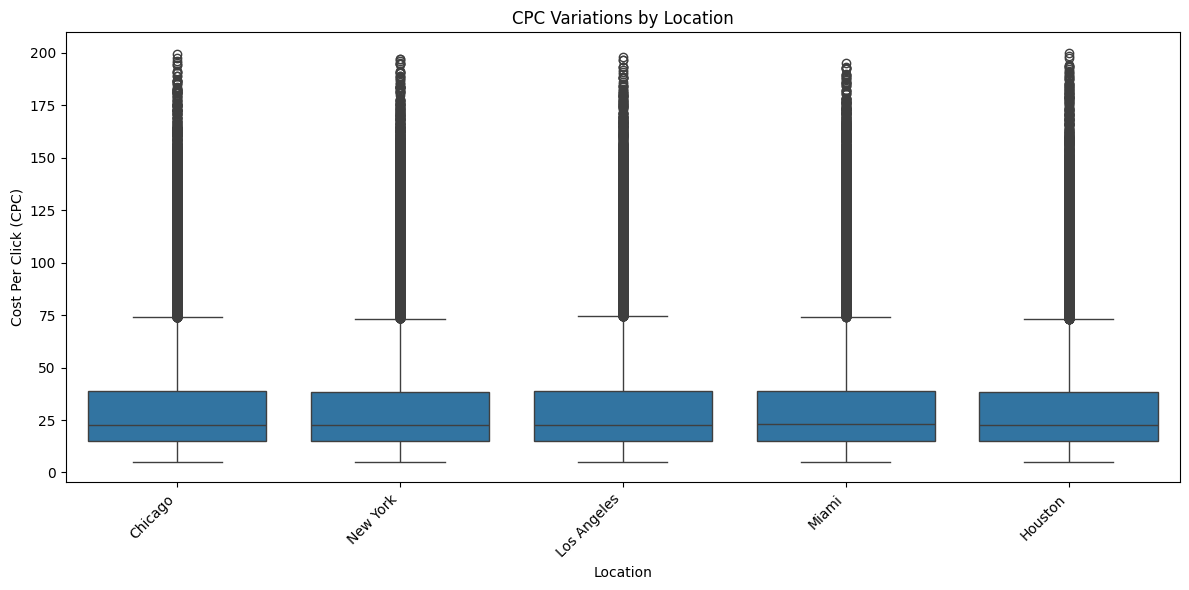

In [128]:
# 2. Boxplot: Compare CPC Variations by Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='CPC', data=campaign)
plt.title('CPC Variations by Location')
plt.xlabel('Location')
plt.ylabel('Cost Per Click (CPC)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()